<a href="https://colab.research.google.com/github/kimdain0222/deep_learning2/blob/main/10%EC%A3%BC%EC%B0%A8(%EA%B5%90%EC%88%98ver)mlp_backpropagation_2_hidden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 100
d = 2
c = 3

- 특징 2개, class 3개
> - **ex>** 키와 체중 특징 값으로, 과체중/정상체중/저체중으로 분류하는 문제

In [ ]:
np.random.seed(42)
X = np.random.randn(n,d)
X[35:70,:] = X[35:70,:] - 2
X[70:,:] = X[70:,:] + 2

In [ ]:
t = np.zeros((n,c))
t[:35,0] = 1
t[35:70,1] = 1
t[70:,2] = 1

- `X.shape[0]`: 데이터 샘플의 수 (키와 체중 데이터를 제공한 사람의 인원 수)
- `X.shape[1]`: **특징의 수** (키, 체중) = **input layer node의 수**
- `y.shape[0]`: 데이터 샘플의 수, 반드시 `X.shape[0]`과 동일해야 함
- `y.shape[1]`: 분류하고자 하는 **class의 수** = **output layer node의 수**
- `n`(데이터 샘플의 수) = `100`, `d`(특징의 수) = `2`, `c`(class의 수) = `3` 이므로
> - `X.shape = (100,2)`
> - `t.shape = (100,3)`

In [ ]:
print(X.shape, t.shape)

(100, 2) (100, 3)


- **MLP**의 구조
> - **input layer node의 수**: 2 (= 특징의수 = `X.shape[1]`)
> - **hidden layer 1 node의 수**: 5
> - **hidden layer 2 node의 수**: 4
> - **output layer node의 수**: 3 (= class의 수 = `t.shape[1]`)

In [ ]:
input_node = d
hid1_node = 5
hid2_node = 4
output_node = c

- **가중치 및 편향의 초기값 설정**
- `W.shape` = (**출발 layer node의 수**, **도착 layer node의 수**)
- `b.shape` = (**해당 layer node의 수**,)

In [ ]:
# 순방향 가중치
W1 = np.random.randn(input_node,hid1_node)
W2 = np.random.randn(hid1_node,hid2_node)
W3 = np.random.randn(hid2_node,output_node)
b1 = np.random.randn(hid1_node)
b2 = np.random.randn(hid2_node)
b3 = np.random.randn(output_node)
# 역방향 가중치(backpropagation)
# - 역방향 가중치와 순방향 가중치의 관계는 Transpose
W1_b = W1.T
W2_b = W2.T
W3_b = W3.T

- **activation function**: sigmoid

In [ ]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

- **activation function**(sigmoid)의 **미분**

In [ ]:
def d_sigmoid(a):
    return sigmoid(a) * (1 - sigmoid(a))

- **predict** 함수 정의

In [ ]:
def predict(X,W1,W2,W3,b1,b2,b3):
    a1 = X.dot(W1) + b1
    z1 = sigmoid(a1)
    a2 = z1.dot(W2) + b2
    z2 = sigmoid(a2)
    a3 = z2.dot(W3) + b3
    y = sigmoid(a3)
    return a1,z1,a2,z2,a3,y

- **Backpropagation**
> - learning rate: 0.1
> - epochs: 1000

In [ ]:
eta = 0.1
epochs = 10000
cost = []

In [ ]:
for i in range(epochs):
    a1,z1,a2,z2,a3,y = predict(X,W1,W2,W3,b1,b2,b3)
    cost.append(np.mean((t-y)**2))

    del_out = (y-t) * d_sigmoid(a3)
    del_hid2 = del_out.dot(W3_b) * d_sigmoid(a2)
    del_hid1 = del_hid2.dot(W2_b) * d_sigmoid(a1)

    W3_b = W3_b - (eta/n)*del_out.T.dot(z2)
    W2_b = W2_b - (eta/n)*del_hid2.T.dot(z1)
    W1_b = W1_b - (eta/n)*del_hid1.T.dot(X)

    b3 = b3 - (eta/n)*np.sum(del_out,axis=0)
    b2 = b2 - (eta/n)*np.sum(del_hid2,axis=0)
    b1 = b1 - (eta/n)*np.sum(del_hid1,axis=0)

    W1 = W1_b.T
    W2 = W2_b.T
    W3 = W3_b.T

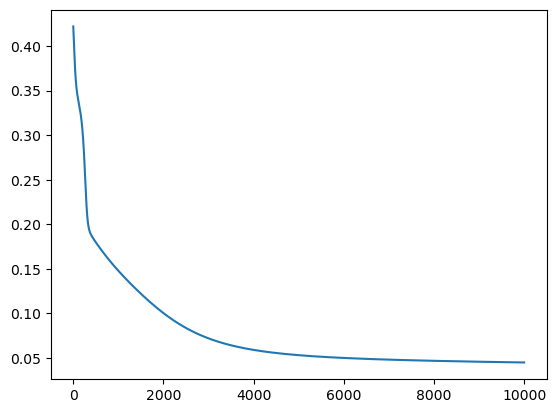

In [ ]:
plt.plot(cost)

In [ ]:
cost[-1]

0.04479344167270756

In [1]:
# 데이터 생성 부분
n = 100  # 데이터 샘플의 수 (100명)
d = 2    # 특징의 수 (키와 체중 2가지)
c = 3    # 클래스 수 (과체중/정상체중/저체중 3가지)

# 재현성을 위한 랜덤 시드 설정
np.random.seed(42)

# 특징 데이터 생성: 100x2 크기의 정규분포 난수
X = np.random.randn(n,d)

# 데이터를 3개의 클래스로 나누어 위치를 다르게 만듦
# 클래스 0: 원래 위치
# 클래스 1: x축으로 -2 이동
X[35:70,:] = X[35:70,:] - 2
# 클래스 2: x축으로 +2 이동
X[70:,:] = X[70:,:] + 2

# 타겟(정답) 레이블 생성: one-hot encoding 형식
t = np.zeros((n,c))
t[:35,0] = 1      # 첫 35개 샘플은 클래스 0
t[35:70,1] = 1    # 다음 35개 샘플은 클래스 1
t[70:,2] = 1      # 마지막 30개 샘플은 클래스 2

print(X.shape, t.shape)  # (100, 2) (100, 3)

# 신경망 구조 정의
input_node = d      # 입력층 노드 수: 2 (키, 체중)
hid1_node = 5       # 첫 번째 은닉층 노드 수: 5
hid2_node = 4       # 두 번째 은닉층 노드 수: 4
output_node = c     # 출력층 노드 수: 3 (3개 클래스 분류)

# 가중치 및 편향 초기화 (순전파용)
# W1: 입력층(2) → 은닉층1(5)로 가는 가중치
W1 = np.random.randn(input_node,hid1_node)
# W2: 은닉층1(5) → 은닉층2(4)로 가는 가중치
W2 = np.random.randn(hid1_node,hid2_node)
# W3: 은닉층2(4) → 출력층(3)로 가는 가중치
W3 = np.random.randn(hid2_node,output_node)

# 편향 초기화
b1 = np.random.randn(hid1_node)    # 은닉층1의 편향
b2 = np.random.randn(hid2_node)    # 은닉층2의 편향
b3 = np.random.randn(output_node)  # 출력층의 편향

# 역전파용 가중치 (순전파 가중치의 전치행렬)
W1_b = W1.T  # 역방향: 은닉층1 → 입력층
W2_b = W2.T  # 역방향: 은닉층2 → 은닉층1
W3_b = W3.T  # 역방향: 출력층 → 은닉층2

# 활성화 함수: 시그모이드
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

# 시그모이드 함수의 도함수 (미분)
def d_sigmoid(a):
    return sigmoid(a) * (1 - sigmoid(a))

# 순전파(예측) 함수
def predict(X,W1,W2,W3,b1,b2,b3):
    # 은닉층 1 계산
    a1 = X.dot(W1) + b1  # 선형 변환
    z1 = sigmoid(a1)     # 활성화 함수 적용

    # 은닉층 2 계산
    a2 = z1.dot(W2) + b2
    z2 = sigmoid(a2)

    # 출력층 계산
    a3 = z2.dot(W3) + b3
    y = sigmoid(a3)      # 최종 출력 (예측값)

    return a1,z1,a2,z2,a3,y  # 중간값들도 반환 (역전파에 필요)

# 학습 파라미터 설정
eta = 0.1      # 학습률 (가중치 업데이트 크기 결정)
epochs = 10000 # 전체 데이터셋을 반복 학습할 횟수
cost = []      # 손실값 기록용 리스트

# 학습 루프
for i in range(epochs):
    # 1. 순전파: 입력 → 출력 계산
    a1,z1,a2,z2,a3,y = predict(X,W1,W2,W3,b1,b2,b3)

    # 2. 손실 계산: MSE(평균제곱오차)
    cost.append(np.mean((t-y)**2))

    # 3. 역전파: 오차 계산 (체인룰 적용)
    # 출력층 오차 = (예측값 - 실제값) × 출력층 활성화 함수 미분
    del_out = (y-t) * d_sigmoid(a3)

    # 은닉층2 오차 = (다음층 오차 × 가중치^T) × 은닉층2 활성화 함수 미분
    del_hid2 = del_out.dot(W3_b) * d_sigmoid(a2)

    # 은닉층1 오차 = (다음층 오차 × 가중치^T) × 은닉층1 활성화 함수 미분
    del_hid1 = del_hid2.dot(W2_b) * d_sigmoid(a1)

    # 4. 가중치 업데이트 (경사하강법)
    # 역전파용 가중치 업데이트 (실제로는 순전파 가중치를 업데이트하기 위한 중간 계산)
    W3_b = W3_b - (eta/n)*del_out.T.dot(z2)  # W3 업데이트
    W2_b = W2_b - (eta/n)*del_hid2.T.dot(z1) # W2 업데이트
    W1_b = W1_b - (eta/n)*del_hid1.T.dot(X)  # W1 업데이트

    # 편향 업데이트 (오차의 합)
    b3 = b3 - (eta/n)*np.sum(del_out,axis=0)
    b2 = b2 - (eta/n)*np.sum(del_hid2,axis=0)
    b1 = b1 - (eta/n)*np.sum(del_hid1,axis=0)

    # 역전파용 가중치를 순전파 가중치로 변환
    W1 = W1_b.T
    W2 = W2_b.T
    W3 = W3_b.T

# 손실 그래프 출력
plt.plot(cost)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Time')
plt.show()

NameError: name 'np' is not defined

In [2]:
1. 데이터 구조
X: 100명의 키와 체중 데이터 (100×2)

t: 100명의 체중 상태 레이블 (one-hot encoding, 100×3)

2. 신경망 구조
text
입력층(2) → 은닉층1(5) → 은닉층2(4) → 출력층(3)
3. 학습 과정
순전파: 입력 → 출력 계산

손실 계산: 예측값과 실제값 차이 측정 (MSE 사용)

역전파: 출력 → 입력 방향으로 오차 전파

가중치 업데이트: 경사하강법으로 가중치 조정

SyntaxError: invalid character '×' (U+00D7) (ipython-input-2280961914.py, line 2)